In [3]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.stats import entropy

import math

In [4]:
def evaluate(actual, predictions, output=True):
    mse = metrics.mean_squared_error(actual, predictions)
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse    

def plot_and_eval(predictions, actual, metric_fmt='{:.2f}', linewidth=4):
    if type(predictions) is not list:
        predictions = [predictions]

    plt.figure(figsize=(16, 8))
    plt.plot(train,label='Train')
    plt.plot(test, label='Test')

    for yhat in predictions:
        mse, rmse = evaluate(actual, yhat, output=False)        
        label = f'{yhat.name}'
        if len(predictions) > 1:
            label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.plot(yhat, label=label, linewidth=linewidth)

    if len(predictions) == 1:
        label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.title(label)

    plt.legend(loc='best')
    plt.show()    

In [7]:
df = pd.read_csv('anonymized-curriculum-access.txt', sep=' ', header=None)

In [9]:
df.head(10)

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
5,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61
6,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61
7,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61
8,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61
9,2018-01-26,09:58:26,javascript-i/functions,4,22.0,97.105.19.61


# Label columns

In [78]:
df.columns=['date', 'time', 'path', 'id', 'cohort', 'ip']

In [79]:
df.head()

,date,time,path,id,cohort,ip
timestamp,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 399195 entries, 2018-01-26 09:55:03 to 2019-11-19 10:07:45
Data columns (total 6 columns):
date      399195 non-null object
time      399195 non-null object
path      399195 non-null object
id        399195 non-null int64
cohort    372441 non-null float64
ip        399195 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 21.3+ MB


# Convert date and time cols to datetime objects

In [123]:
df['date'] = pd.to_datetime(df.date)

In [124]:
df['time'] = pd.to_datetime(df.time)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 399195 entries, 2018-01-26 09:55:03 to 2019-11-19 10:07:45
Data columns (total 6 columns):
date      399195 non-null datetime64[ns]
time      399195 non-null datetime64[ns]
path      399195 non-null object
id        399195 non-null int64
cohort    372441 non-null float64
ip        399195 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 21.3+ MB


# Create timestamp column and set as index

In [81]:
df['timestamp'] = df.date + ' ' + df.time

In [82]:
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')

# Explore Cohort Col

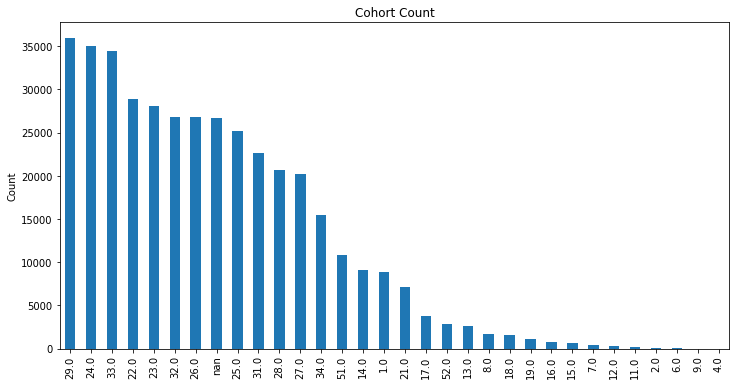

In [85]:
#df.cohort.sort_values()

df.cohort.value_counts(ascending=False, dropna=False).plot.bar(figsize=(12,6))

plt.title('Cohort Count')
plt.ylabel('Count')
plt.show()

# Explore Path Col

In [40]:
df.path.value_counts()

/                                                                            20564
javascript-i                                                                  8140
search/search_index.json                                                      7005
toc                                                                           6679
html-css                                                                      6143
java-iii                                                                      6003
spring                                                                        5761
jquery                                                                        5501
java-ii                                                                       5386
mysql                                                                         5103
java-i                                                                        5039
javascript-ii                                                                 5024
mysq

In [99]:
df.path.str.split(pat='/', expand=True)

,0,1,2,3,4,5,6,7
timestamp,,,,,,,,
2018-01-26 09:55:03,,,None,None,None,None,None,None
2018-01-26 09:56:02,java-ii,None,None,None,None,None,None,None
2018-01-26 09:56:05,java-ii,object-oriented-programming,None,None,None,None,None,None
2018-01-26 09:56:06,slides,object_oriented_programming,None,None,None,None,None,None
2018-01-26 09:56:24,javascript-i,conditionals,None,None,None,None,None,None
2018-01-26 09:56:41,javascript-i,loops,None,None,None,None,None,None
2018-01-26 09:56:46,javascript-i,conditionals,None,None,None,None,None,None
2018-01-26 09:56:48,javascript-i,functions,None,None,None,None,None,None
2018-01-26 09:56:59,javascript-i,loops,None,None,None,None,None,None


In [ ]:
#df['webdev'] = df['path'].map{''}

In [49]:
df[df.id == 27].path

timestamp
2018-01-26 11:40:33                                              /
2018-01-26 11:40:35                                         spring
2018-01-26 11:40:40    spring/fundamentals/security/authentication
2018-01-26 11:58:56              spring/fundamentals/relationships
2018-01-26 11:59:13               spring/fundamentals/repositories
2018-01-26 12:18:32              spring/fundamentals/relationships
2018-01-26 12:27:59                                              /
2018-01-26 12:28:01                                       html-css
2018-01-26 12:28:09                          html-css/css-ii/grids
2018-01-29 08:59:53                                              /
2018-01-29 09:53:10                                       appendix
2018-01-29 09:53:14                     appendix/capstone-workbook
2018-01-29 10:29:43                                       html-css
2018-01-29 10:29:48                                 html-css/forms
2018-01-29 11:38:45                                 

# Explore ID Value Counts

- How many time has each id accessed the curriculum?

In [47]:
df.id.value_counts()

53     8236
64     8008
11     8004
344    5279
1      4266
314    3233
423    2995
323    2846
354    2821
211    2625
418    2598
127    2563
410    2398
277    2367
347    2318
325    2248
363    2237
433    2217
337    2183
186    2180
274    2136
315    2130
416    2103
368    2063
304    2061
272    2008
197    1993
275    1900
264    1898
269    1894
       ... 
137      10
279      10
84       10
141       9
95        9
388       8
107       8
104       8
401       7
115       6
152       5
399       5
71        5
169       5
82        5
62        4
216       4
85        4
246       4
348       3
177       3
89        3
176       3
81        3
97        2
66        1
461       1
163       1
165       1
212       1
Name: id, Length: 543, dtype: int64

# IP Counts

- How many times has the curriculum been accessed from each IP address?

In [75]:
df.ip.value_counts()

97.105.19.58       227220
97.105.19.61        61662
192.171.117.210      8127
70.122.40.62         1338
66.69.108.117        1199
173.174.211.206      1019
108.65.244.91        1007
170.248.173.245       997
67.11.157.190         972
66.69.62.219          934
70.118.8.243          876
72.181.104.64         865
170.248.173.247       828
216.1.153.162         823
67.11.215.97          818
76.185.131.226        793
173.173.113.51        779
67.11.239.2           777
99.61.24.168          765
67.10.174.56          739
72.181.98.75          681
45.23.250.16          663
67.10.161.55          651
136.50.18.71          631
76.204.31.63          618
4.16.216.161          610
72.181.110.80         607
170.248.173.246       590
67.10.166.10          578
70.121.163.5          577
                    ...  
107.77.220.108          1
66.69.68.137            1
173.123.121.68          1
159.192.201.107         1
76.214.156.188          1
173.239.232.115         1
99.203.90.253           1
134.196.44.1

# Geekdom IP

- Isolate the access to curriculum from Geekdom IP address.

In [98]:
# geekdom_ip = df[df.ip == '192.171.117.210']

geekdom_ip.groupby('cohort').id.count()

cohort
1.0       85
2.0        7
7.0       79
11.0      10
13.0       1
14.0     132
15.0      16
16.0       1
17.0      43
18.0     116
19.0      36
21.0      81
22.0     410
23.0     425
24.0    1129
25.0    1353
26.0    1119
27.0     274
28.0     203
29.0     488
31.0     295
32.0    1036
33.0     195
34.0     162
51.0      38
52.0      57
Name: id, dtype: int64

# IP Address Probability

- What is the probability that the curriculum will be accessed from an IP address?

In [76]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_count'})
ip_df2 = pd.DataFrame(df.ip.value_counts(dropna=False)/df.ip.count()).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_proba'})
ip_df = ip_df.merge(ip_df2)

In [77]:
# ip addresses with rate less than 1%

ip_df[ip_df.ip_proba < .01]

,ip,ip_count,ip_proba
3,70.122.40.62,1338,0.003352
4,66.69.108.117,1199,0.003004
5,173.174.211.206,1019,0.002553
6,108.65.244.91,1007,0.002523
7,170.248.173.245,997,0.002498
8,67.11.157.190,972,0.002435
9,66.69.62.219,934,0.002340
10,70.118.8.243,876,0.002194
11,72.181.104.64,865,0.002167
12,170.248.173.247,828,0.002074


# Bayes Cohort 

- Identify the Bayes cohort id as 34.

# My ID
- Identify my id number as 480 by using my home IP address.

In [103]:
# my ip; I have accessed the Codeup curric from home 163 times in this log

len(df[df.ip == "75.1.166.163"])

163

In [104]:
# my id is 480

df[df.ip == "75.1.166.163"]

,date,time,path,id,cohort,ip
timestamp,,,,,,
2019-08-24 16:09:31,2019-08-24,16:09:31,1-fundamentals/2.4-more-excel-features,480,34.0,75.1.166.163
2019-08-24 16:10:46,2019-08-24,16:10:46,1-fundamentals/2.3-visualization-with-excel,480,34.0,75.1.166.163
2019-08-24 17:38:44,2019-08-24,17:38:44,1-fundamentals/2.4-more-excel-features,480,34.0,75.1.166.163
2019-08-24 20:07:36,2019-08-24,20:07:36,1-fundamentals/2.3-visualization-with-excel,480,34.0,75.1.166.163
2019-08-24 21:32:15,2019-08-24,21:32:15,1-fundamentals/2.2-excel-functions,480,34.0,75.1.166.163
2019-08-24 21:32:17,2019-08-24,21:32:17,1-fundamentals/2.3-visualization-with-excel,480,34.0,75.1.166.163
2019-08-25 08:16:40,2019-08-25,08:16:40,2-storytelling/1-overview,480,34.0,75.1.166.163
2019-08-25 09:06:39,2019-08-25,09:06:39,2-storytelling/2.1-understand,480,34.0,75.1.166.163
2019-08-25 09:06:56,2019-08-25,09:06:56,2-storytelling/2.2-create,480,34.0,75.1.166.163


## Min and Max times and dates for my access from home

- Why are these returning today's date for time col?

In [129]:
# last time I accessed the curric from home in this data set.

df[df.ip == '75.1.166.163'].date.max()

Timestamp('2019-11-18 00:00:00')

In [131]:
df[df.ip == '75.1.166.163'].max()

date           2019-11-18 00:00:00
time           2019-11-29 23:08:26
path      search/search_index.json
id                             480
cohort                          34
ip                    75.1.166.163
dtype: object

In [130]:
# first time I accessed the curric from home in this data set

df[df.ip == '75.1.166.163'].date.min()

Timestamp('2019-08-24 00:00:00')

In [132]:
df[df.ip == '75.1.166.163'].min()

date      2019-08-24 00:00:00
time      2019-11-29 06:31:10
path                        /
id                        480
cohort                     34
ip               75.1.166.163
dtype: object

## I have accessed Curriculum 7 times from Geekdom

In [120]:
df[(df.ip == '192.171.117.210') & (df.id == 480)]

,date,time,path,id,cohort,ip
timestamp,,,,,,
2019-09-07 13:02:07,2019-09-07,13:02:07,3-sql/11-more-exercises,480,34.0,192.171.117.210
2019-09-07 13:03:20,2019-09-07,13:03:20,3-sql/10-temporary-tables,480,34.0,192.171.117.210
2019-09-08 11:01:20,2019-09-08,11:01:20,3-sql/7-functions,480,34.0,192.171.117.210
2019-09-08 11:02:14,2019-09-08,11:02:14,3-sql/10-temporary-tables,480,34.0,192.171.117.210
2019-09-08 11:02:23,2019-09-08,11:02:23,3-sql/7-functions,480,34.0,192.171.117.210
2019-11-03 15:22:03,2019-11-03,15:22:03,8-clustering/4-explore,480,34.0,192.171.117.210
2019-11-03 15:23:01,2019-11-03,15:23:01,8-clustering/project,480,34.0,192.171.117.210


## I access the curric from Codeup, home, and Geekdom.

In [122]:
df[df.id == 480].ip.value_counts()

97.105.19.58       348
75.1.166.163       163
192.171.117.210      7
Name: ip, dtype: int64

## What paths am I accessing?

- I use the search index the most of all paths followed by the root page.

- Looks like I return to SQL curric pages a lot!

- I also seem to look back at the explore sections the most, and I bet I'm probably trying to get code to visualize data.

In [133]:
df[df.id == 480].path.value_counts()

search/search_index.json                       17
/                                              14
7-classification/project                       12
3-sql/10-temporary-tables                      11
6-regression/5.0-evaluate                      11
6-regression/8.0-Project                       10
3-sql/11-more-exercises                        10
3-sql/7-functions                              10
6-regression/1-overview                        10
1-fundamentals/2.3-visualization-with-excel    10
1-fundamentals/modern-data-scientist.jpg        9
3-sql/9.4-subqueries                            9
1-fundamentals/AI-ML-DL-timeline.jpg            9
4-python/7.4.4-advanced-dataframes              9
4-python/7.4.3-dataframes                       9
8-clustering/3-wrangle                          9
3-sql/5-basic-statements                        9
1-fundamentals/2.4-more-excel-features          8
4-python/7.4.2-series                           8
5-stats/4.2-compare-means                       8


In [134]:
# top hits -> Codeup
# 

df[df.cohort == 34].ip.value_counts()

97.105.19.58       12070
70.226.109.182       394
70.117.31.136        343
67.10.174.4          232
71.78.109.210        216
65.43.118.72         180
67.11.115.125        164
75.1.166.163         163
192.171.117.210      162
136.50.49.145        161
172.124.64.127       155
172.8.173.224        117
76.211.181.33        116
67.11.138.10         105
172.14.106.31         91
66.69.81.250          90
67.11.120.157         85
99.158.246.101        70
12.197.196.242        62
108.174.80.231        50
70.226.110.58         47
99.98.32.97           34
136.50.54.2           31
67.78.73.114          29
216.110.79.11         28
67.11.82.11           23
99.158.247.1          19
12.247.3.50           15
71.42.196.114         15
107.132.82.186        15
                   ...  
166.251.109.196        3
107.77.222.219         3
166.251.109.240        3
72.181.113.170         3
67.79.15.43            3
67.48.59.123           3
71.78.217.82           2
184.226.92.76          2
12.97.187.15           2
